# PRIMER ENTREGA DEL PROYECTO FINAL
Presentación de la empresa y el proyecto
Empresa: Equipo de Analisis y Desarrollo EA Argentina

Proyecto: predecir que posición ocupa un jugador en base a sus estadísticas de el videojuego FIFA 19

Presentación de los datos
El archivo FIFA 19.csv contiene los datos de los jugadores de el videojuego con todas sus características.

Fue extraído de la página Kaggle.com

Equipo de trabajo
Ignacio Kalbermatten
Javier Gomez
Josue Pozo
Yamil Merlo

In [1]:
#Importación de librerías

# Operaciones Basicas
import numpy as np
import pandas as pd
import pandas_profiling

# Visualizacion de Datos
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Importando el dataset
df = pd.read_csv('FIFA 19 data.csv')
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,...,GKKicking,GKPositioning,GKReflexes,Release Clause,DOB,Height,Weight,Right Foot,Offensive Work Rate,Defensive Work Rate
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,5.0,...,15.0,14.0,8.0,226500000.0,1987-06-24,170,72,False,Medium,Medium
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,5.0,...,15.0,14.0,11.0,127100000.0,1985-02-05,187,83,True,High,Low
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,5.0,...,15.0,15.0,11.0,228100000.0,1992-02-05,175,68,True,High,Medium
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,4.0,...,87.0,88.0,94.0,138600000.0,1990-11-07,193,76,True,Medium,Medium
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,4.0,...,5.0,10.0,13.0,196400000.0,1991-06-28,181,70,True,High,High


In [4]:
#Veamos el shape
df.shape

(17219, 82)

# DATA WRANGLING

In [5]:
#verifiquemos las caracteristicas de las variables de nuestra base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17219 entries, 0 to 17218
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      17219 non-null  object 
 1   Age                       17219 non-null  int64  
 2   Nationality               17219 non-null  object 
 3   Overall                   17219 non-null  int64  
 4   Potential                 17219 non-null  int64  
 5   Club                      17219 non-null  object 
 6   Value                     17219 non-null  float64
 7   Wage                      17219 non-null  float64
 8   Special                   17219 non-null  int64  
 9   International Reputation  17219 non-null  float64
 10  Weak Foot                 17219 non-null  float64
 11  Skill Moves               17219 non-null  float64
 12  Body Type                 17219 non-null  object 
 13  Position                  17219 non-null  object 
 14  Jersey

In [6]:
#Verificamos si existen registros nulos
df.isnull().sum()

Name                   0
Age                    0
Nationality            0
Overall                0
Potential              0
                      ..
Height                 0
Weight                 0
Right Foot             0
Offensive Work Rate    0
Defensive Work Rate    0
Length: 82, dtype: int64

Verificamos que los datos a trabajar se encuentran en correctas condiciones, no hay nulos, los tipos de datos son los correctos.
Podemos asegurar la fiabilidad, credibilidad y calidad de los datos limpios para utilizarlo en la toma de decisiones.

# EDA

Como primer encuentro con la data podemos ver el Heatmap de las variables para ver la relación entre cada una de las variables

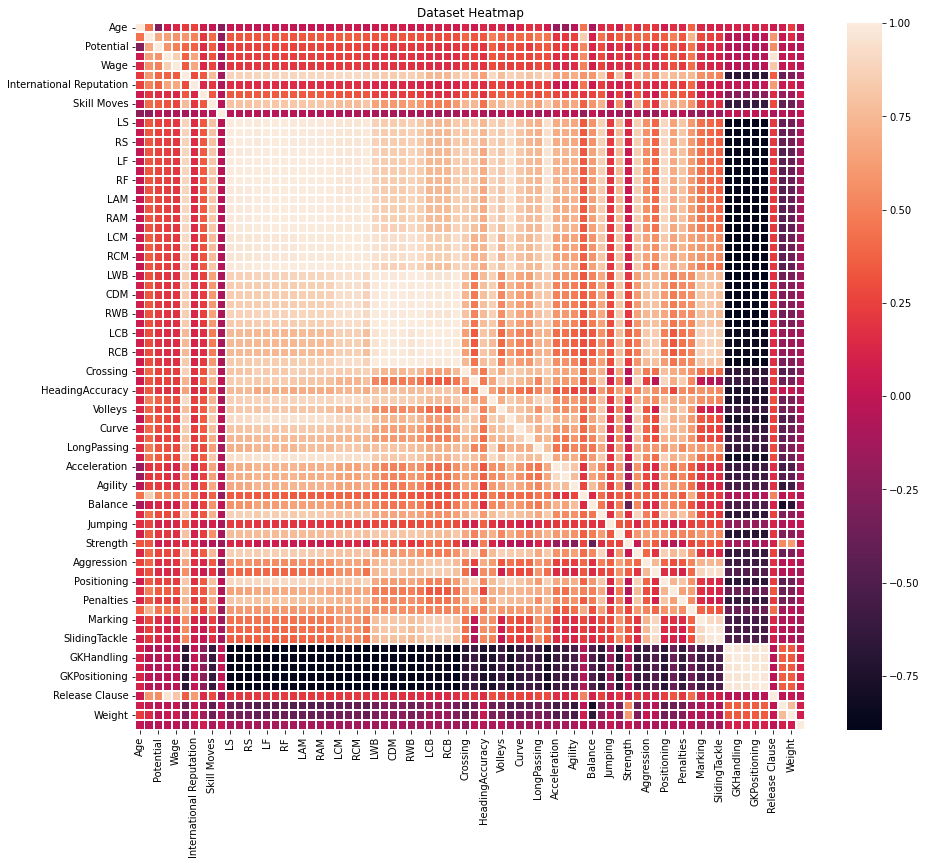

In [7]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(),linewidths=1)
plt.title('Dataset Heatmap')
plt.show()

Veamos algunos casos sencillos de analisis univariado y bivariado para verificar que las relaciones entre variables sean logicas

Por ejemplo... nos preguntaremos: afecta la edad al rendimiento del jugador?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


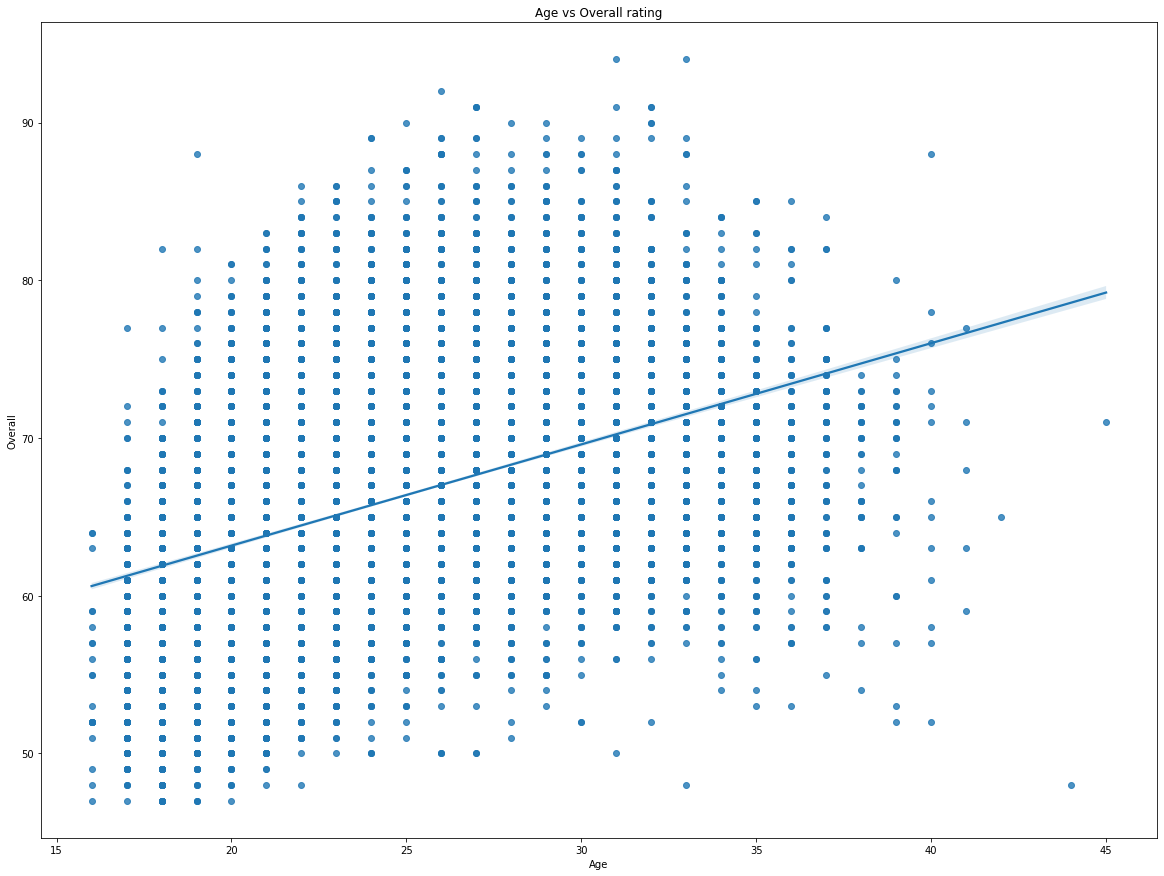

In [8]:
plt.figure(figsize=(20, 15))
sns.regplot(df['Age'] , df['Overall'])
plt.title('Age vs Overall rating')
plt.show()

Con el grafico vemos una correlacion lineal entre la edad del jugador y su overall El OVERALL se compone de todas las estadísticas del jugador y estos se utilizan para ayudar a calcular una calificación general de 100. Vemos que los jugadores con mejores caracteristicas generales alcanzan su apogeo a la edad entre 28 - 35 años, considerando este limite como la edad promedio del retiro en los últimos años de un jugador profesional.

Veamos ahora la comparacion entre el potencial de un jugador, su edad y su valuacion en el mercado:

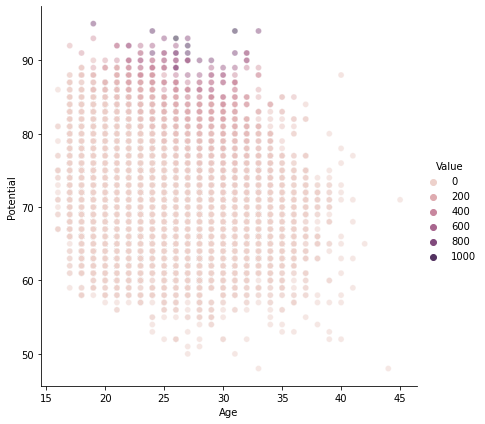

In [9]:
value = df.Value
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.relplot(x="Age", y="Potential", hue=value/100000, 
            sizes=(40, 400), alpha=.5,
            height=6, data=df);

en correlacion con el analisis anterior, los jugadores tienen un mayor potencial en su edad temprana de profesionalismo, su valuacion en mercado es baja... pero esta relacion simetrica tiene a variar en su edad madurativa que oscila entre los 25 - 35 años considerando este como la edad promedio de apogeo profesional y donde su valuacion del mercado alcanza picos maximos.

Vamos a ver la distribucion de la variable posicion de jugador en el dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


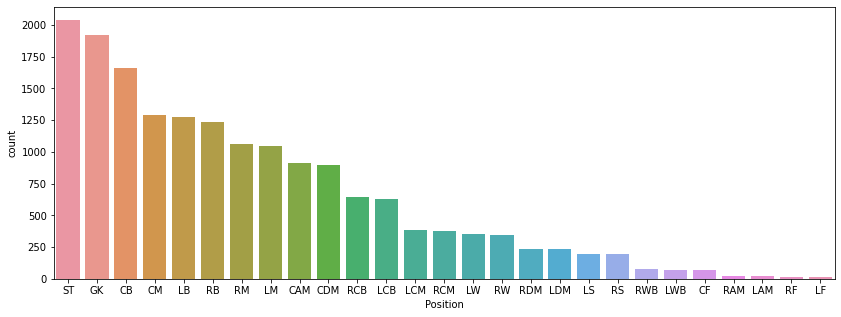

In [10]:
plt.figure(figsize=(14, 5))
sns.countplot(df.Position.dropna(), order = df.Position.value_counts().index)

Con estas pruebas vemos que los datos se relacionan en forma correcta. es hora de centrarnos en nuestro objetivo.
Para ello vamos a seleccionar solo las columnas que interesan a nuestro analisis, es decir a las variables caracteristicas

In [11]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Body Type', 'Position', 'Jersey Number', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'DOB', 'Height', 'Weight', 'Right Foot',
       'Offensive Work Rate', 'De

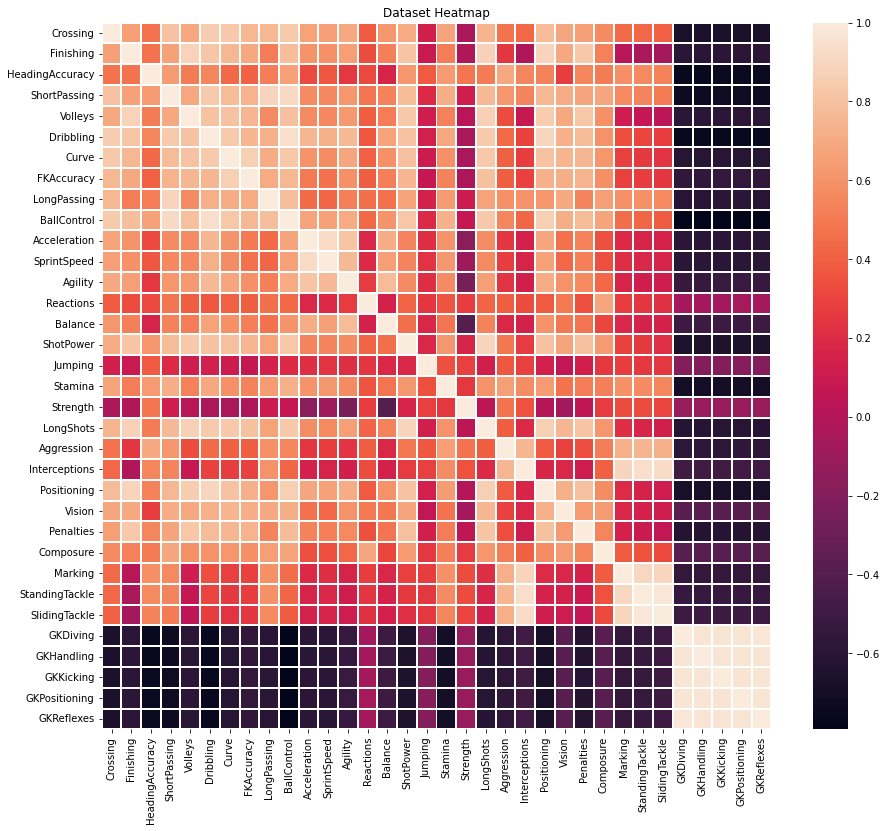

In [12]:
plt.figure(figsize=(15,13))
sns.heatmap(df[['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']].corr(),linewidths=1)
plt.title('Dataset Heatmap')
plt.show()

con el grafico precedente podemos ver que aquellas caracteristicas propias de los GK son notorias siendo este un outlier en nuestro analisis. 

In [13]:
#Vamos a crear un DataFrame con las columnas necesarias
Caracteristicas= [
    'Acceleration',
    'Aggression',
    'Agility',
    'Balance',
    'BallControl',
    'Composure',
    'Crossing',
    'Curve',
    'Dribbling',
    'FKAccuracy',
    'Finishing',
    'HeadingAccuracy',
    'Interceptions',
    'Jumping',
    'LongPassing',
    'LongShots',
    'Marking',
    'Penalties',
    'Position',
    'Positioning',
    'Reactions',
    'ShortPassing',
    'ShotPower',
    'SlidingTackle',
    'SprintSpeed',
    'Stamina',
    'StandingTackle',
    'Strength',
    'Vision',
    'Volleys',
]
df = pd.DataFrame(df, columns = Caracteristicas)

Haremos un nuevo heatmap para verificar la correlacion de las variables necesarias

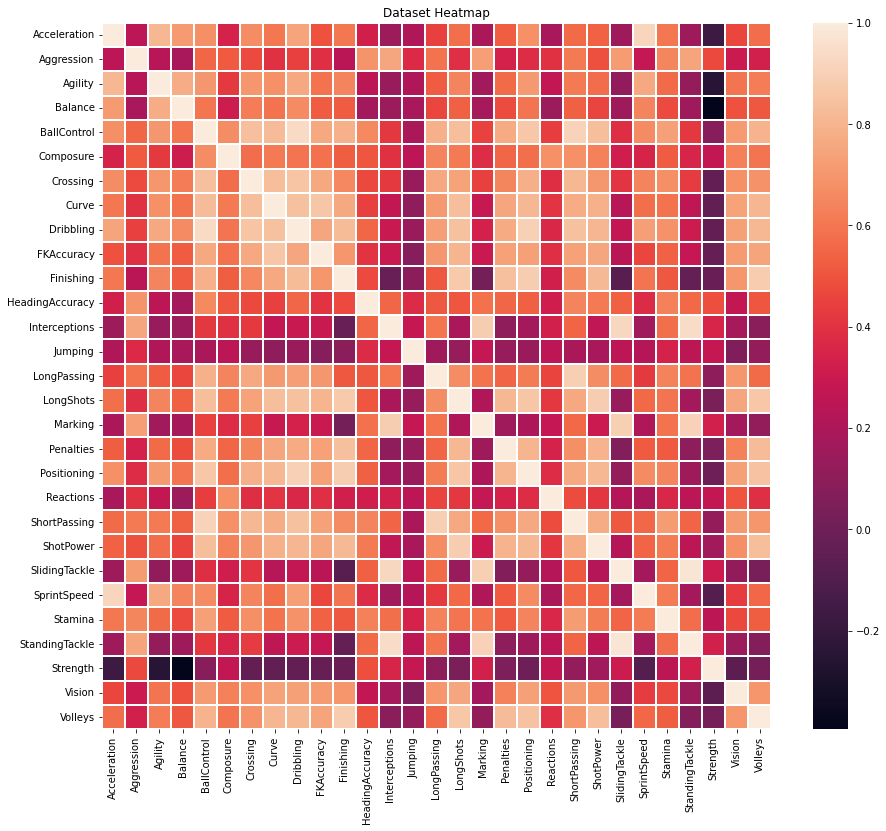

In [14]:
plt.figure(figsize=(15,13))
sns.heatmap(df[['Acceleration',
    'Aggression',
    'Agility',
    'Balance',
    'BallControl',
    'Composure',
    'Crossing',
    'Curve',
    'Dribbling',
    'FKAccuracy',
    'Finishing',
    'HeadingAccuracy',
    'Interceptions',
    'Jumping',
    'LongPassing',
    'LongShots',
    'Marking',
    'Penalties',
    'Position',
    'Positioning',
    'Reactions',
    'ShortPassing',
    'ShotPower',
    'SlidingTackle',
    'SprintSpeed',
    'Stamina',
    'StandingTackle',
    'Strength',
    'Vision',
    'Volleys']].corr(),linewidths=1)
plt.title('Dataset Heatmap')
plt.show()

In [15]:
df[["StandingTackle","Interceptions","Finishing","Positioning","Volleys","LongShots","Aggression","Vision","Dribbling","Penalties","Strength","HeadingAccuracy","ShotPower","Curve","Agility","Jumping","BallControl","Balance","Acceleration","Stamina","SprintSpeed","ShortPassing","Reactions","Crossing","LongPassing","Composure"]].corr()

,StandingTackle,Interceptions,Finishing,Positioning,Volleys,LongShots,Aggression,Vision,Dribbling,Penalties,...,BallControl,Balance,Acceleration,Stamina,SprintSpeed,ShortPassing,Reactions,Crossing,LongPassing,Composure
StandingTackle,1.000000,0.941874,-0.031755,0.157702,0.072550,0.173331,0.744717,0.146505,0.302889,0.102405,...,0.420034,0.153401,0.160140,0.571049,0.175722,0.543099,0.250520,0.429399,0.590707,0.354065
Interceptions,0.941874,1.000000,-0.020486,0.169306,0.087374,0.193588,0.751135,0.181942,0.296461,0.110934,...,0.419771,0.149849,0.148772,0.576006,0.160902,0.544257,0.332198,0.427583,0.599462,0.398040
Finishing,-0.031755,-0.020486,1.000000,0.889263,0.882922,0.877416,0.243939,0.695653,0.824212,0.837506,...,0.787885,0.523427,0.606021,0.511325,0.592394,0.662890,0.329239,0.654866,0.512000,0.529264
Positioning,0.157702,0.169306,0.889263,1.000000,0.848879,0.860964,0.381373,0.732986,0.896733,0.801164,...,0.863815,0.596353,0.681211,0.640406,0.663069,0.758369,0.382541,0.782846,0.613480,0.576711
Volleys,0.072550,0.087374,0.882922,0.848879,1.000000,0.867862,0.330253,0.697323,0.809611,0.829515,...,0.794583,0.512643,0.570924,0.527408,0.555030,0.698420,0.392057,0.688925,0.569264,0.591786
LongShots,0.173331,0.193588,0.877416,0.860964,0.867862,1.000000,0.391795,0.752147,0.843781,0.812445,...,0.835551,0.533546,0.579105,0.596154,0.559663,0.762435,0.417029,0.741668,0.667772,0.611974
Aggression,0.744717,0.751135,0.243939,0.381373,0.330253,0.391795,1.000000,0.297141,0.442146,0.337382,...,0.550797,0.184093,0.248466,0.646093,0.276526,0.611968,0.395887,0.472712,0.590090,0.515296
Vision,0.146505,0.181942,0.695653,0.732986,0.697323,0.752147,0.297141,1.000000,0.728217,0.631689,...,0.714968,0.493311,0.461119,0.471232,0.427970,0.710810,0.500330,0.682930,0.696113,0.632387
Dribbling,0.302889,0.296461,0.824212,0.896733,0.809611,0.843781,0.442146,0.728217,1.000000,0.769626,...,0.939352,0.663847,0.748218,0.688097,0.725924,0.845530,0.365712,0.856872,0.722670,0.594754
Penalties,0.102405,0.110934,0.837506,0.801164,0.829515,0.812445,0.337382,0.631689,0.769626,1.000000,...,0.769907,0.481561,0.531163,0.515447,0.518182,0.677275,0.344148,0.646122,0.542382,0.549652


In [16]:
PJ_Caracteristicas = ('Acceleration',
    'Aggression',
    'Agility',
    'Balance',
    'BallControl',
    'Composure',
    'Crossing',
    'Curve',
    'Dribbling',
    'FKAccuracy',
    'Finishing',
    'HeadingAccuracy',
    'Interceptions',
    'Jumping',
    'LongPassing',
    'LongShots',
    'Marking',
    'Penalties',
    'Position',
    'Positioning',
    'Reactions',
    'ShortPassing',
    'ShotPower',
    'SlidingTackle',
    'SprintSpeed',
    'Stamina',
    'StandingTackle',
    'Strength',
    'Vision',
    'Volleys',   
)

# Veamos que caracteristicas sobresalen a cada posicion
for i, val in df.groupby(df['Position'])[PJ_Caracteristicas].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(3).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Strength, Jumping, StandingTackle
Position CDM: Stamina, Aggression, Strength
Position CF: Agility, Balance, Acceleration
Position CM: Balance, ShortPassing, Agility
Position GK: Strength, Reactions, Jumping
Position LAM: Agility, Balance, SprintSpeed
Position LB: SprintSpeed, Acceleration, Stamina
Position LCB: Strength, Jumping, StandingTackle
Position LCM: Stamina, ShortPassing, Balance
Position LDM: Stamina, ShortPassing, Strength
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, SprintSpeed, Agility
Position LS: SprintSpeed, Strength, Acceleration
Position LW: Acceleration, SprintSpeed, Agility
Position LWB: Stamina, SprintSpeed, Acceleration
Position RAM: Agility, Balance, Acceleration
Position RB: SprintSpeed, Stamina, Acceleration
Position RCB: Strength, Jumping, Aggression
Position RCM: Stamina, ShortPassing, Agility
Position RDM: Stamina, ShortPassing, Aggression
Position RF: Agility, Acceleration,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Vamos a graficar la distribucion por area de cada caracteristica dependiendo de la posicion del jugador

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


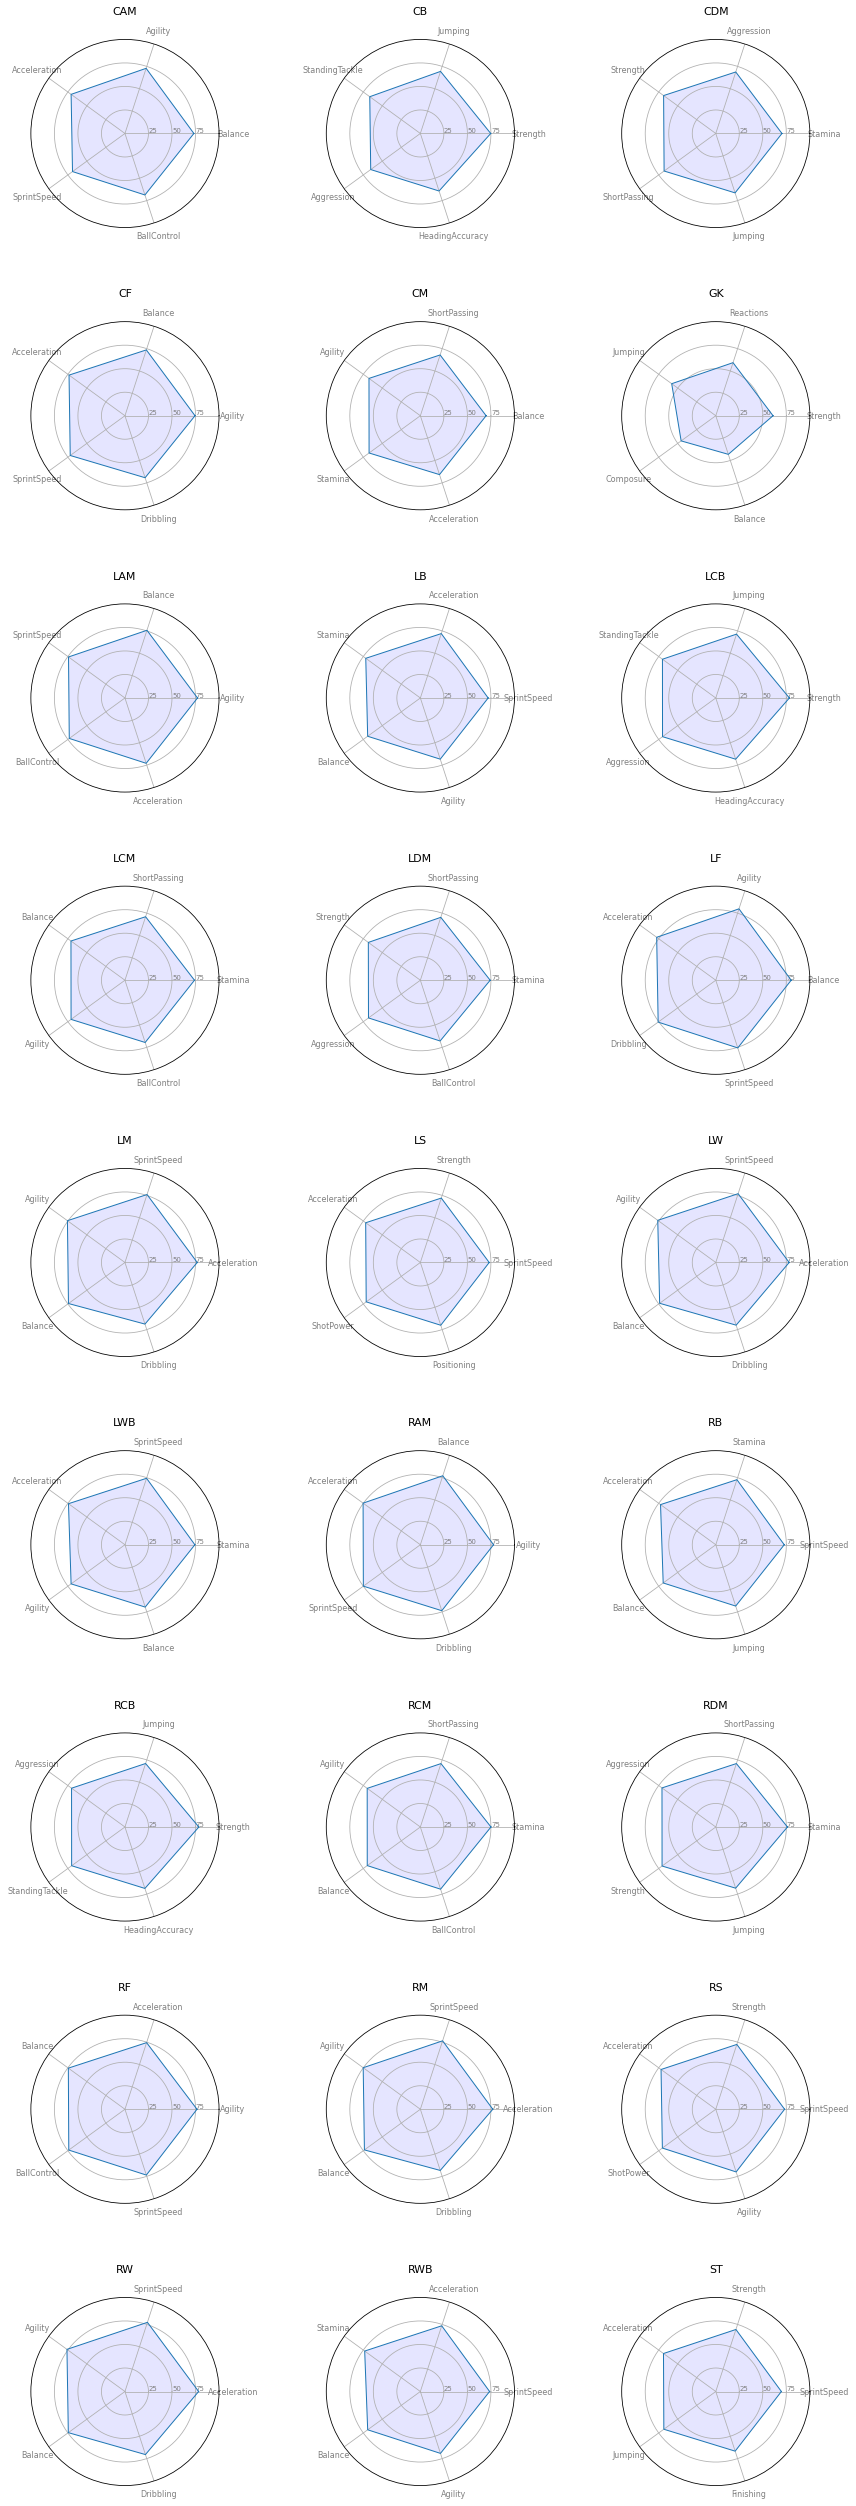

In [17]:
idx = 1
plt.figure(figsize=(15,45))
for position_name, features in df.groupby(df['Position'])[PJ_Caracteristicas].mean().iterrows():
    top_caracteristica = dict(features.nlargest(5))
    
    # Numero de variable
    categories=top_caracteristica.keys()
    N = len(categories)

    #Vamos a trazar la primera línea del marco de datos, repitiendo el primer valor para cerrar el gráfico circular:
    values = list(top_caracteristica.values())
    values += values[:1]

    #Para hallar el ángulo de cada eje en el gráfico (dividimos plot / número de variable)
    pi = 3.14159265359
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Realicemos un spider plot
    ax = plt.subplot(9, 3, idx, polar=True)

    # xlabels
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1 

Con los codigos precedentes ya sabemos que atributos son los mas relevantes para cada posicion, con esto ya tenemos la base de nuestro modelo para la predicion de posicion.